In [1]:
import sys
sys.path.insert(0, '../captcha') # use modified library
print(sys.path)

from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
import string
%matplotlib inline

['../captcha', '', '/home/joel/anaconda2/envs/ml/lib/python36.zip', '/home/joel/anaconda2/envs/ml/lib/python3.6', '/home/joel/anaconda2/envs/ml/lib/python3.6/lib-dynload', '/home/joel/.local/lib/python3.6/site-packages', '/home/joel/anaconda2/envs/ml/lib/python3.6/site-packages', '/home/joel/anaconda2/envs/ml/lib/python3.6/site-packages/Mako-1.0.7-py3.6.egg', '/home/joel/anaconda2/envs/ml/lib/python3.6/site-packages/instagram_scraper-1.5.40-py3.6.egg', '/home/joel/anaconda2/envs/ml/lib/python3.6/site-packages/IPython/extensions', '/home/joel/.ipython']


In [ ]:
def prepare_lines(prefix, filename, random_str, boxes):
    if len(random_str) != len(boxes):
        raise Exception('The lengths of random string and list of boxes differ.')
    line = ""
    for i in range(len(random_str)):
        line += prefix + filename + ',' + str(boxes[i][0]) + ',' + str(boxes[i][1]) + ',' + str(boxes[i][2]) + ',' + str(boxes[i][3]) + ',' + random_str[i] + '\n'
    return line

Jjkwox


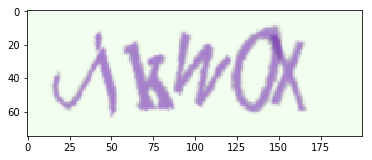

In [14]:
# A test

characters = string.digits + string.ascii_uppercase + string.ascii_lowercase
width, height, n_class = 200, 75, len(characters)
generator = ImageCaptcha(width=width, height=height, curve=False, dots=False)

n_len = 6
random_str = ''.join([random.choice(characters) for j in range(n_len)])
img, boxes = generator.generate_image(random_str, bbox=True)

print(random_str)
plt.imshow(img)

In [ ]:
# Define an alphanumeric character set
characters = string.digits + string.ascii_uppercase + string.ascii_lowercase

width, height, n_class = 200, 75, len(characters)

generator = ImageCaptcha(width=width, height=height)

num_samples, split = 2000, .8
split_index = int(split * num_samples) - 1

f = open("../data/bboxes.csv","w+")

for i in np.arange(0, num_samples):
    n_len = random.randint(4,7)
    random_str = ''.join([random.choice(characters) for j in range(n_len)])
    img, boxes = generator.generate_image(random_str, bbox=True)
    filename = str(i) + '_' + random_str + '.png'
    if i <= split_index:
        img.save('../data/captcha/train/' + filename, 'png')
        lines = prepare_lines('/home/jovyan/captcha-breaker/captcha-breaker/data/captcha/train/', filename, random_str, boxes)
        f.write(lines)
    else:
        img.save('../data/captcha/test/' + filename, 'png')
        lines = prepare_lines('/home/jovyan/captcha-breaker/captcha-breaker/data/captcha/test/', filename, random_str, boxes)
        f.write(lines)
        
f.close()